1. Visualize the time series
2. Stationaries the series
3. Plot ACF/PACF charts and find optimal parameters
4. Build the ARIMA model
5. Make predictions


Loading packages for preprocessing and data visualization 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
 

Setting up the enviroment

In [ ]:
import tensorflow as tf
import theano
import keras
import scipy 
import statsmodels
import sklearn
import os

In [ ]:
from keras.layers import Dense, Embedding
from keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import SGD 
from keras.callbacks import EarlyStopping
from keras.utils import np_utils
import itertools
from keras.layers import LSTM
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers import Dropout

In [ ]:
from sklearn import metrics # for the check the error and accuracy of the model
from sklearn.metrics import mean_squared_error,r2_score


In [ ]:
import warnings
warnings.filterwarnings('ignore')

Loading the 2 datasets 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df= pd.read_csv('/content/drive/My Drive/Dataset/out.csv', index_col = 2, parse_dates=True)
df.index.freq='MS'

In [ ]:
df

,Unnamed: 0,turbines,pitch_angle,output_power,generator_speed,gearbox_inlet_temp,nacelle_angle,wind_speed,wind_direction,temperature,rotor_speed
Date_time,,,,,,,,,,,
2013-01-01 00:00:00+01:00,0,R80721,-1.01,684.15997,1714.71,44.700001,165.10001,7.25,163.16000,5.72,16.360001
2013-01-01 00:00:00+01:00,1,R80736,-1.00,804.21997,1776.53,49.480000,286.00000,7.64,286.19000,5.44,16.950001
2013-01-01 00:00:00+01:00,2,R80790,-0.98,1093.81990,1800.01,48.369999,175.59000,8.56,175.05000,5.48,17.180000
2013-01-01 00:00:00+01:00,3,R80711,-1.00,1072.79000,1799.91,48.369999,161.44000,8.96,165.25000,5.09,17.180000
2013-01-01 00:10:00+01:00,4,R80711,-1.00,1061.75000,1798.88,55.080002,161.44000,8.89,168.28999,5.26,17.170000
...,...,...,...,...,...,...,...,...,...,...,...
2018-01-12 23:20:00+01:00,777706,R80736,-0.64,54.67000,973.69,49.880000,49.63000,4.27,40.63000,3.76,9.270000
2018-01-12 23:20:00+01:00,777707,R80711,-0.83,70.40000,996.08,55.480000,55.98000,4.26,61.01000,3.82,9.480000
2018-01-12 23:30:00+01:00,777708,R80790,-0.07,28.18000,970.00,52.020000,68.05000,3.69,58.53000,3.52,9.230000


In [ ]:
#df.corr()

Dropping columns not included in the final features as predicted by the feature selection model

In [ ]:
df = df.drop(['Unnamed: 0','turbines', 'gearbox_inlet_temp', 'nacelle_angle', 'wind_direction'], axis=1)

In [ ]:
#df= pd.read_csv('/content/drive/My Drive/Dataset/combined_dataset.csv', index_col = 2, parse_dates=True)


In [ ]:
df.columns

Index(['pitch_angle', 'output_power', 'generator_speed', 'wind_speed',
       'temperature', 'rotor_speed'],
      dtype='object')

In [ ]:
#df.replace(np.nan,0, inplace=True)


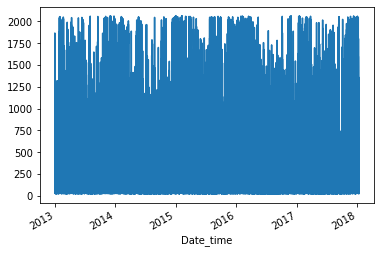

In [ ]:
df['output_power'].plot()
plt.show()

In [ ]:
df

,pitch_angle,output_power,generator_speed,wind_speed,temperature,rotor_speed
Date_time,,,,,,
2013-01-01 00:00:00+01:00,-1.01,684.15997,1714.71,7.25,5.72,16.360001
2013-01-01 00:00:00+01:00,-1.00,804.21997,1776.53,7.64,5.44,16.950001
2013-01-01 00:00:00+01:00,-0.98,1093.81990,1800.01,8.56,5.48,17.180000
2013-01-01 00:00:00+01:00,-1.00,1072.79000,1799.91,8.96,5.09,17.180000
2013-01-01 00:10:00+01:00,-1.00,1061.75000,1798.88,8.89,5.26,17.170000
...,...,...,...,...,...,...
2018-01-12 23:20:00+01:00,-0.64,54.67000,973.69,4.27,3.76,9.270000
2018-01-12 23:20:00+01:00,-0.83,70.40000,996.08,4.26,3.82,9.480000
2018-01-12 23:30:00+01:00,-0.07,28.18000,970.00,3.69,3.52,9.230000


In [ ]:
df = df[['output_power','pitch_angle', 'generator_speed','wind_speed', 'temperature', 'rotor_speed']]

In [ ]:
df

,output_power,pitch_angle,generator_speed,wind_speed,temperature,rotor_speed
Date_time,,,,,,
2013-01-01 00:00:00+01:00,684.15997,-1.01,1714.71,7.25,5.72,16.360001
2013-01-01 00:00:00+01:00,804.21997,-1.00,1776.53,7.64,5.44,16.950001
2013-01-01 00:00:00+01:00,1093.81990,-0.98,1800.01,8.56,5.48,17.180000
2013-01-01 00:00:00+01:00,1072.79000,-1.00,1799.91,8.96,5.09,17.180000
2013-01-01 00:10:00+01:00,1061.75000,-1.00,1798.88,8.89,5.26,17.170000
...,...,...,...,...,...,...
2018-01-12 23:20:00+01:00,54.67000,-0.64,973.69,4.27,3.76,9.270000
2018-01-12 23:20:00+01:00,70.40000,-0.83,996.08,4.26,3.82,9.480000
2018-01-12 23:30:00+01:00,28.18000,-0.07,970.00,3.69,3.52,9.230000


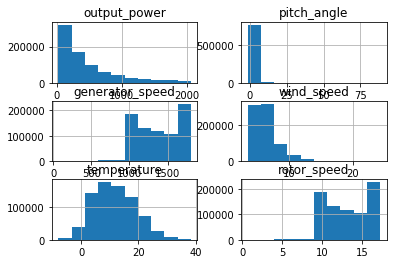

In [ ]:
df.hist()
plt.show()

In [ ]:
df.index = pd.to_datetime(df.index, utc=True)


In [ ]:
df.index

DatetimeIndex(['2012-12-31 23:00:00+00:00', '2012-12-31 23:00:00+00:00',
               '2012-12-31 23:00:00+00:00', '2012-12-31 23:00:00+00:00',
               '2012-12-31 23:10:00+00:00', '2012-12-31 23:10:00+00:00',
               '2012-12-31 23:10:00+00:00', '2012-12-31 23:10:00+00:00',
               '2012-12-31 23:20:00+00:00', '2012-12-31 23:20:00+00:00',
               ...
               '2018-01-12 22:10:00+00:00', '2018-01-12 22:10:00+00:00',
               '2018-01-12 22:10:00+00:00', '2018-01-12 22:20:00+00:00',
               '2018-01-12 22:20:00+00:00', '2018-01-12 22:20:00+00:00',
               '2018-01-12 22:20:00+00:00', '2018-01-12 22:30:00+00:00',
               '2018-01-12 22:30:00+00:00', '2018-01-12 23:00:00+00:00'],
              dtype='datetime64[ns, UTC]', name='Date_time', length=777711, freq=None)

Hourly resampling 

In [ ]:
#df_resample = df.resample('M', on='Date_time').mean()
df_resample = df.resample('h').mean()
df_resample.shape

(44113, 6)

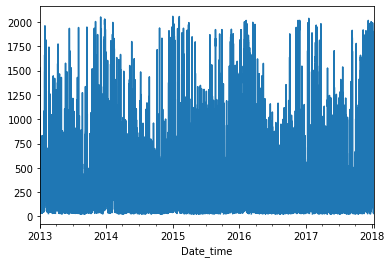

In [ ]:
df_resample['output_power'].plot()


In [ ]:
#df_resample.isna().sum()

In [ ]:
df_resample.dropna(inplace=True)

In [ ]:
#df_resample.isna().sum()

Checking for staionarity

In [ ]:
from statsmodels.tsa.stattools import adfuller

print('Augmented Dickey Fuller Test')

df_test = adfuller(df_resample['output_power'],autolag='AIC')
df_adf = pd.Series(df_test[0:4],index=['ADF test statistics', 'p-value', '# lags used', '# observations'])

for key,val in df_test[4].items():
    df_adf[f'critical value ({key})']=val
    
print(df_adf) 

Augmented Dickey Fuller Test
ADF test statistics    -1.794183e+01
p-value                 2.858889e-30
# lags used             4.300000e+01
# observations          3.859300e+04
critical value (1%)    -3.430519e+00
critical value (5%)    -2.861615e+00
critical value (10%)   -2.566810e+00
dtype: float64


In [ ]:
data = df_resample.values
#data = data.astype('float32')

In [ ]:
data

array([[ 1.02515082e+03, -9.97500005e-01,  1.78910168e+03,
         8.55416673e+00,  5.96125005e+00,  1.70745834e+01],
       [ 9.35422917e+02, -9.92499999e-01,  1.77602457e+03,
         8.23999993e+00,  6.25166673e+00,  1.69495831e+01],
       [ 8.96413327e+02, -9.95416668e-01,  1.76167290e+03,
         8.08875006e+00,  6.36249995e+00,  1.68112502e+01],
       ...,
       [ 8.64141667e+01, -8.67083333e-01,  1.01738958e+03,
         4.54958333e+00,  4.69208333e+00,  9.68125000e+00],
       [ 1.00747857e+02, -8.15714286e-01,  1.05261214e+03,
         4.67000000e+00,  3.93642857e+00,  1.00200000e+01],
       [ 2.90100000e+01, -6.00000000e-02,  9.70110000e+02,
         3.52000000e+00,  2.58000000e+00,  9.23000000e+00]])

In [ ]:
#data= data.reshape(-1,1)

Building the model

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
data = scaler.fit_transform(data)

In [ ]:
data.shape

(38637, 6)

Function to convert to supervised learning

In [ ]:
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	dff = pd.DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(dff.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(dff.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = pd.concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg

In [ ]:
scaled = series_to_supervised(data, 1,1)

In [ ]:
scaled.drop(scaled.columns[[7,8,9,10,11]], axis=1, inplace=True)

In [ ]:
scaled

,var1(t-1),var2(t-1),var3(t-1),var4(t-1),var5(t-1),var6(t-1),var1(t)
1,0.491731,0.000520,0.991816,0.317357,0.295343,0.991693,0.447603
2,0.447603,0.000602,0.983320,0.297630,0.301739,0.983217,0.428418
3,0.428418,0.000554,0.973996,0.288132,0.304179,0.973837,0.537538
4,0.537538,0.001860,0.991330,0.341845,0.290801,0.991156,0.674962
5,0.674962,0.005429,0.996959,0.408874,0.275671,0.996807,0.742209
...,...,...,...,...,...,...,...
38632,0.101728,0.000561,0.655728,0.123646,0.293940,0.655356,0.091346
38633,0.091346,0.031522,0.616033,0.111413,0.284286,0.615803,0.027481
38634,0.027481,0.002947,0.484291,0.057951,0.269110,0.484361,0.030065
38635,0.030065,0.002660,0.490447,0.065904,0.267395,0.490351,0.037115


Splitting to train and test set

In [ ]:
values = scaled.values

train_time = 9659*3

train = values[:train_time, :]
test = values[train_time:, :]


X_train, y_train = train[:,:-1], train[:, -1]
X_test, y_test = test[:,:-1], test[:, -1]


X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(28977, 1, 6) (28977,) (9659, 1, 6) (9659,)


In [ ]:
X_train

array([[[4.91730866e-01, 5.19644023e-04, 9.91815884e-01, 3.17356500e-01,
         2.95343403e-01, 9.91693242e-01]],

       [[4.47603184e-01, 6.01693171e-04, 9.83319888e-01, 2.97629633e-01,
         3.01738779e-01, 9.83216970e-01]],

       [[4.28418486e-01, 5.53831191e-04, 9.73995833e-01, 2.88132493e-01,
         3.04179479e-01, 9.73836610e-01]],

       ...,

       [[2.69641236e-01, 5.60668549e-04, 8.88703639e-01, 2.03652349e-01,
         3.64930961e-01, 8.88395967e-01]],

       [[2.06529875e-01, 1.50942882e-01, 7.49396141e-01, 1.89759825e-01,
         3.66692671e-01, 7.49385446e-01]],

       [[2.68084503e-01, 5.60668549e-04, 8.98828424e-01, 2.02945949e-01,
         3.69105850e-01, 8.98680497e-01]]])

In [ ]:
X_train

array([[[4.91730866e-01, 5.19644023e-04, 9.91815884e-01, 3.17356500e-01,
         2.95343403e-01, 9.91693242e-01]],

       [[4.47603184e-01, 6.01693171e-04, 9.83319888e-01, 2.97629633e-01,
         3.01738779e-01, 9.83216970e-01]],

       [[4.28418486e-01, 5.53831191e-04, 9.73995833e-01, 2.88132493e-01,
         3.04179479e-01, 9.73836610e-01]],

       ...,

       [[2.69641236e-01, 5.60668549e-04, 8.88703639e-01, 2.03652349e-01,
         3.64930961e-01, 8.88395967e-01]],

       [[2.06529875e-01, 1.50942882e-01, 7.49396141e-01, 1.89759825e-01,
         3.66692671e-01, 7.49385446e-01]],

       [[2.68084503e-01, 5.60668549e-04, 8.98828424e-01, 2.02945949e-01,
         3.69105850e-01, 8.98680497e-01]]])

Model

In [ ]:
from keras.backend import relu
from keras.callbacks import EarlyStopping

optimizer = tf.keras.optimizers.Adam(lr=1e-4)
model = Sequential()
model.add(LSTM(6, dropout=0.2, recurrent_dropout=0.2, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
#model.add(Dropout(0.2))
model.add(Dense(6, activation='relu'))
#model.add(Dense(3, activation='relu'))
#    model.add(Dropout(0.3))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer=optimizer)
monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=10,verbose=1,mode='auto', restore_best_weights=True)

In [ ]:
model.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_17 (LSTM)              (None, 6)                 312       
                                                                 
 dense_35 (Dense)            (None, 6)                 42        
                                                                 
 dense_36 (Dense)            (None, 1)                 7         
                                                                 
Total params: 361
Trainable params: 361
Non-trainable params: 0
_________________________________________________________________


Epoch 1/1000
906/906 - 6s - loss: 0.0563 - val_loss: 0.0525 - 6s/epoch - 7ms/step
Epoch 2/1000
906/906 - 3s - loss: 0.0433 - val_loss: 0.0458 - 3s/epoch - 3ms/step
Epoch 3/1000
906/906 - 3s - loss: 0.0384 - val_loss: 0.0411 - 3s/epoch - 4ms/step
Epoch 4/1000
906/906 - 2s - loss: 0.0335 - val_loss: 0.0346 - 2s/epoch - 3ms/step
Epoch 5/1000
906/906 - 3s - loss: 0.0270 - val_loss: 0.0257 - 3s/epoch - 3ms/step
Epoch 6/1000
906/906 - 3s - loss: 0.0201 - val_loss: 0.0176 - 3s/epoch - 3ms/step
Epoch 7/1000
906/906 - 3s - loss: 0.0150 - val_loss: 0.0118 - 3s/epoch - 3ms/step
Epoch 8/1000
906/906 - 3s - loss: 0.0123 - val_loss: 0.0092 - 3s/epoch - 4ms/step
Epoch 9/1000
906/906 - 3s - loss: 0.0111 - val_loss: 0.0083 - 3s/epoch - 3ms/step
Epoch 10/1000
906/906 - 3s - loss: 0.0104 - val_loss: 0.0080 - 3s/epoch - 3ms/step
Epoch 11/1000
906/906 - 3s - loss: 0.0101 - val_loss: 0.0079 - 3s/epoch - 3ms/step
Epoch 12/1000
906/906 - 3s - loss: 0.0099 - val_loss: 0.0078 - 3s/epoch - 3ms/step
Epoch 13/1000

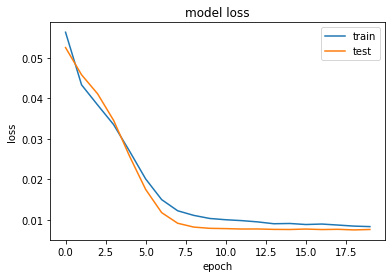

In [ ]:
# fit network
history = model.fit(X_train, y_train, epochs=1000, batch_size=32, validation_data=(X_test, y_test), verbose=2, callbacks=[monitor], shuffle=False)

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [ ]:
# make a prediction
yhat = model.predict(X_test)
X_test = X_test.reshape((X_test.shape[0], 6))
# invert scaling for forecast
inv_yhat = np.concatenate((yhat, X_test[:,-5:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]
# invert scaling for actual
y_test = y_test.reshape((len(y_test), 1))
inv_y = np.concatenate((y_test, X_test[:,-5:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]
# calculate RMSE
rmse = np.sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 181.318


In [ ]:
r2_score(inv_y, inv_yhat)

0.8260433662313325

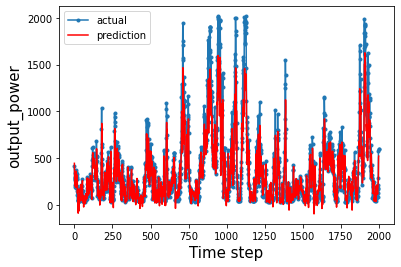

In [ ]:
aa=[x for x in range(2000)]
plt.plot(aa, inv_y[:2000], marker='.', label="actual")
plt.plot(aa, inv_yhat[:2000], 'r', label="prediction")
plt.ylabel('output_power', size=15)
plt.xlabel('Time step', size=15)
plt.legend(fontsize=10)
plt.show()

In [ ]:
save_path = "/content/drive/My Drive/models/"
model.save(os.path.join(save_path,'turbine.h5'))